<a href="https://colab.research.google.com/github/Sakshi3071/LetsGrowMore-VIP---DS-Internship-Task-1/blob/main/Iris_Flowers_Classification_ML_Project_(LGM)Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**IRIS FLOWER CLASSIFIER**

---



---



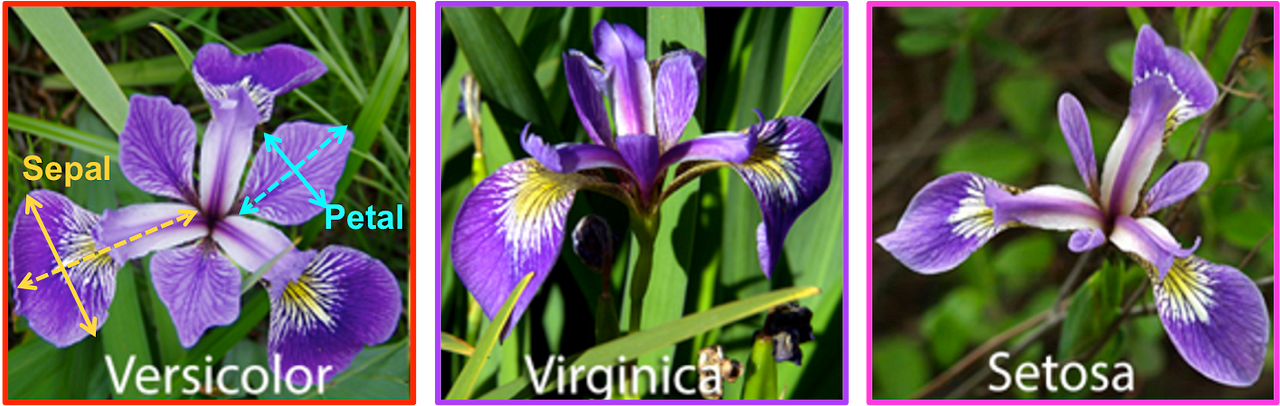



---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc,classification_report

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
X = iris.drop('species',axis = 1,inplace = False)
y = iris['species']



---

**Train_Test_Split**

---



---



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
#shape of X_train, X_test, y_train, y_test
print("The Shape of X_train:",X_train.shape)
print("The Shape of X_test:",X_test.shape)
print("The Shape of y_train:",y_train.shape)
print("The Shape of y_test:",y_test.shape)

The Shape of X_train: (120, 4)
The Shape of X_test: (30, 4)
The Shape of y_train: (120,)
The Shape of y_test: (30,)




---


**Logistic Regression**

---



---



In [10]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [12]:
y_pred_lr = lr.predict(X_test)

In [13]:
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print('The accuracy score of Logistic Regression Classification Model is:',accuracy_lr)

The accuracy score of Logistic Regression Classification Model is: 1.0


<BarContainer object of 150 artists>

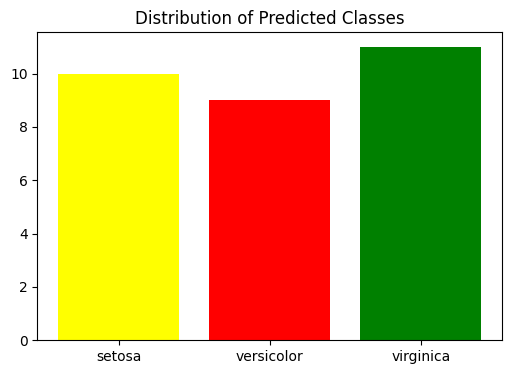

In [14]:
# Generate the classification report
report_lr = classification_report(y_test, y_pred_lr, target_names=['setosa','versicolor','virginica'] ,output_dict=True)

# Extract the class labels and their counts from the classification report
class_labels = list(y)
class_counts = [report_lr[label]['support'] for label in class_labels]

# Define the colors for each class
colors = ['red', 'yellow', 'green']

# Plot a bar chart or a pie chart to visualize the distribution of predicted classes
plt.figure(figsize=(6, 4))
plt.title('Distribution of Predicted Classes')

plt.bar(class_labels, class_counts,color = colors)




---


**K-Neighbors Classifier**

---



---



In [15]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print("The accuracy score for K Neighbors Classifier Model is :",accuracy_knn)

The accuracy score for K Neighbors Classifier Model is : 1.0


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


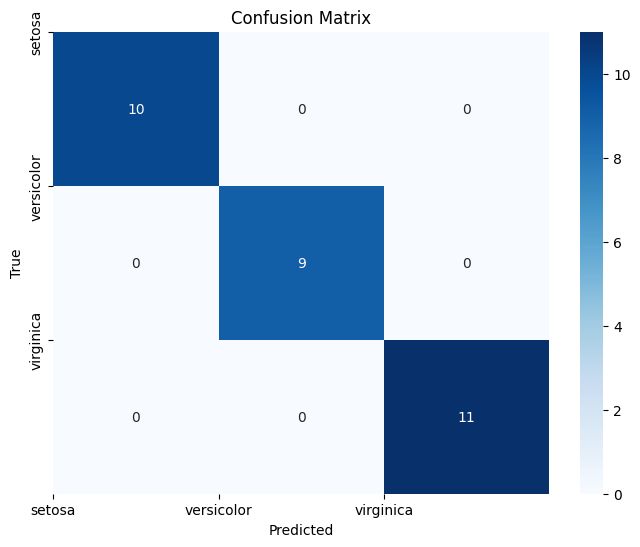

In [17]:
# Generate the classification report
report_knn = classification_report(y_test, y_pred_knn, target_names=['setosa','versicolor','virginica'])
print("Classification Report:\n", report_knn)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

tick_marks = np.arange(len(['setosa','versicolor','virginica']))
plt.xticks(tick_marks, ['setosa','versicolor','virginica'])
plt.yticks(tick_marks, ['setosa','versicolor','virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
# Print the results
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", report_lr)
print('-------------------------------------------------------------')

print('-------------------------------------------------------------')
print("k-NN Accuracy:", accuracy_knn)
print("k-NN Classification Report:\n", report_knn)
print('-------------------------------------------------------------')

Logistic Regression Accuracy: 1.0
Logistic Regression Classification Report:
 {'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'versicolor': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9}, 'virginica': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}}
-------------------------------------------------------------
-------------------------------------------------------------
k-NN Accuracy: 1.0
k-NN Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weight



---



---
##                                                  THE END

---







---

